# Part 28: Logistic Regression

linear regression as a predictive modeling method to estimate numeric variables.

classification: prediction tasks where the response variable is categorical instead of numeric.

__Logistic regression__ takes a linear combination of explanatory variables plus an intercept term just like linear regression, but then it takes the result and passes it through the "logistic" function. The logistic or sigmoid function is defined as:

S(t)=1/(1+e^−t)

where t is the same linear combination of variables used in linear regression. The logistic function looks like an elongated S when plotted:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

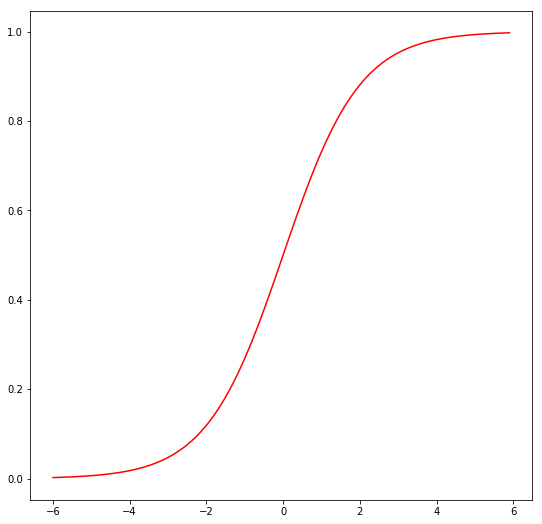

In [3]:
plt.figure(figsize=(9,9))

def sigmoid(t):
    return(1/(1 + np.e**(-t)))

plot_range = np.arange(-6,6,0.1)
y_values = sigmoid(plot_range)

plt.plot(plot_range, y_values, color='red')

The sigmoid function is bounded below by 0 and bounded above by 1. In logistic regression, the output is interpreted as a probability: the probability that an observation belongs to the second of the two categories being modeled. When the linear combination of variables produces positive numbers, the resulting probability is greater than 0.5 and when it produces negative numbers, the probability is less than 0.5.

### Logistic regression on Titanic dataset

In [8]:
import os

os.chdir('/home/sindhuvarun/github/ML-Learning/staticsAndProbability/PythonForDataAnalytics/dataset/Titanic')
titanic_train = pd.read_csv('train.csv')

In [9]:
char_cabin = titanic_train["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var

In [10]:
# Let's make a logistic regression model that only uses the Sex variable as a predictor.
from sklearn import linear_model
from sklearn import preprocessing

In [11]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train['Sex'])

log_model = linear_model.LogisticRegression()

log_model.fit(X=pd.DataFrame(encoded_sex), y=titanic_train['Survived'])

print("Intercepts")
print(log_model.intercept_)

print("Coefficients")
print(log_model.coef_)

Intercepts
[1.00027876]
Coefficients
[[-2.43010712]]


In [18]:
preds = log_model.predict_proba(X=pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ['Death_prob', 'Survival_prob']

pd.crosstab(titanic_train['Sex'], preds.loc[:,'Survival_prob'])

Survival_prob,0.1931254289724867,0.7311133823315537
Sex,,
female,0,314
male,577,0


In [20]:
# More variables in the logistic regression
encoded_class = label_encoder.fit_transform(titanic_train['Pclass'])
encoded_cabin = label_encoder.fit_transform(titanic_train['Cabin'])

train_features = pd.DataFrame([encoded_class, encoded_cabin, encoded_sex, titanic_train['Age']]).T

log_model2 = linear_model.LogisticRegression()

log_model2.fit(X=train_features, y=titanic_train['Survived'])

print("Intercept")
print(log_model2.intercept_)

print("Coefficients")
print(log_model2.coef_)

Intercept
[3.32716302]
Coefficients
[[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


In [21]:
preds = log_model2.predict(X=train_features)
pd.crosstab(preds, titanic_train['Survived'])

Survived,0,1
row_0,,
0,463,98
1,86,244


### Confusion Matrix
The table above shows the classes our model predicted vs. true values of the Survived variable. This table of predicted vs. actual values is known as a __confusion matrix__.

The confusion matrix is a common tool for assessing the results of classification. 

The bottom right corner indicates the __True positives__: people the model predicted to survive who actually did survive. 

The bottom left cell indicates the __false positives__: people for whom the model predicted survival who did not actually survive. 

The top left cell indicates the __true negatives__: people correctly identified as non survivors. 

Finally, the top right cell shows the __false negatives__: passengers the model identified as non survivors who actually did survive.

overall accuracy = (total correct prediction)/(total predictions)

overall accuracy = (True Positives + True Negatives)/(total predictions)


In [23]:
accuracy = (463 + 244)/(463 + 98 + 86 + 244)
accuracy

0.7934904601571269

In [24]:
log_model2.score(X=train_features, y=titanic_train['Survived'])

0.7934904601571269

### Precision and Recall

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall


__Precision__

Precision attempts to answer the following question:
What proportion of positive identifications was actually correct?

Precision = TP/(TP + FP)

__Recall__

Recall attempts to answer the following question:
What proportion of actual positives was identified correctly?

Recall = TP/(TP + FN)

In [25]:
from sklearn import metrics

metrics.confusion_matrix(y_true=titanic_train['Survived'], y_pred=preds)

array([[463,  86],
       [ 98, 244]], dtype=int64)

In [27]:
print(metrics.classification_report(y_true=titanic_train['Survived'], y_pred=preds))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.79      0.79       891

